### Imports

In [1]:
from LoopStructural import GeologicalModel
from LoopStructural.visualisation import LavaVuModelViewer
from LoopStructural.datasets import load_intrusion
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext snakeviz

/home/lgrose/anaconda3/envs/loop/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.decomposition.pca module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.decomposition. Anything that cannot be imported from sklearn.decomposition is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
data, bb = load_intrusion()

In [3]:
fault_data = data[data['type']=='fault']

In [4]:
fault_data

,X,Y,Z,val,coord,type,nx,ny,nz
0,0.0,5500.0,0.0,0.0,0.0,fault,NaN,NaN,NaN
1,300.0,5500.0,0.0,0.0,0.0,fault,NaN,NaN,NaN
2,600.0,5500.0,0.0,0.0,0.0,fault,NaN,NaN,NaN
3,900.0,5500.0,0.0,0.0,0.0,fault,NaN,NaN,NaN
4,1200.0,5500.0,0.0,0.0,0.0,fault,NaN,NaN,NaN
5,1500.0,5500.0,0.0,0.0,0.0,fault,NaN,NaN,NaN
6,1800.0,5500.0,0.0,0.0,0.0,fault,NaN,NaN,NaN
7,2100.0,5500.0,0.0,0.0,0.0,fault,NaN,NaN,NaN
8,2400.0,5500.0,0.0,0.0,0.0,fault,NaN,NaN,NaN
9,2700.0,5500.0,0.0,0.0,0.0,fault,NaN,NaN,NaN


In [5]:
model = GeologicalModel(bb[0,:],bb[1,:])
model.set_model_data(fault_data)
fault = model.create_and_add_fault('fault',
                                   -600,
                                   nelements=2000,
                                   steps=4,
                                   interpolatortype='PLI',
                                  buffer=0.3
                                  )


In [6]:
bedding_val = np.random.random((40,4))
bedding_val[:,0]*=bb[1,0]
bedding_val[:,1]*=bb[1,1]
bedding_val[:,2]=-600
bedding_val[:,3]=0
bedding_val = np.vstack([bedding_val,bedding_val])
bedding_val[40:,2]-=-500
bedding_val[40:,3]= -1
# print(bedding_val)
# print(fault['feature'].evaluate(model.scale(bedding_val)))
bedding_val[:,:3] = model.rescale(fault['feature'].apply_to_points(model.scale(bedding_val[:,:3])))

# print(bedding_val)

In [7]:
new_data = pd.DataFrame(bedding_val,columns=['X','Y','Z','val'])
new_data['type'] = 'strati'
# new_data['val'] = 0

In [8]:
# normal_vec = pd.DataFrame([[9000,10,10,0,0,1]],columns=['X','Y','Z','nx','ny','nz'])
# normal_vec['type'] = 'strati'

data = pd.concat([fault_data,new_data],sort=False)
data

,X,Y,Z,val,coord,type,nx,ny,nz
0,0.000000,5500.000000,0.000000,0.0,0.0,fault,NaN,NaN,NaN
1,300.000000,5500.000000,0.000000,0.0,0.0,fault,NaN,NaN,NaN
2,600.000000,5500.000000,0.000000,0.0,0.0,fault,NaN,NaN,NaN
3,900.000000,5500.000000,0.000000,0.0,0.0,fault,NaN,NaN,NaN
4,1200.000000,5500.000000,0.000000,0.0,0.0,fault,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
75,2570.649589,3940.354646,-542.864560,-1.0,NaN,strati,NaN,NaN,NaN
76,9894.481475,8072.144511,-100.000000,-1.0,NaN,strati,NaN,NaN,NaN
77,8923.420455,7640.011738,-100.000000,-1.0,NaN,strati,NaN,NaN,NaN
78,2470.997351,2753.354772,-542.860262,-1.0,NaN,strati,NaN,NaN,NaN


In [9]:
def planeFit(points):
    """
    p, n = planeFit(points)

    Given an array, points, of shape (d,...)
    representing points in d-dimensional space,
    fit an d-dimensional plane to the points.
    Return a point, p, on the plane (the point-cloud centroid),
    and the normal, n.
    """
    import numpy as np
    from numpy.linalg import svd
    #points = points.T
    #print('p',points.shape)
#     points = np.reshape(points, (np.shape(points)[0], -1)) # Collapse trialing dimensions
    assert points.shape[0] <= points.shape[1], "There are only {} points in {} dimensions.".format(points.shape[1], points.shape[0])
    ctr = points.mean(axis=1)
    x = points - ctr[:,np.newaxis]
    M = np.dot(x, x.T) # Could also use np.cov(x) here.
    U,S,V = svd(M)
    normal = V[-1]
    d = -np.sum(normal*ctr)
    return np.hstack([normal,[d]])

def planeDistance(points):
    params = planeFit(points)
    a, b, c, d = params
    x, y, z = points
    length = np.sqrt(a**2 + b**2 + c**2)
    return (np.abs(a * x + b * y + c * z + d) / length).mean()



In [10]:
import emcee

/home/lgrose/anaconda3/envs/loop/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [38]:
def log_prior(theta):
    displacement, sigma2 = theta
    mu = 600
    sigma = 100
    if sigma <= 0:
        return -np.inf
    if mu <= 0:
        return -np.inf
    if sigma2 <= 0:
        return -np.inf
    return -np.log(1.0/(np.sqrt(2*np.pi)*sigma))-0.5*(displacement-mu)**2/sigma**2 - np.log(sigma) - np.log(mu) - np.log(sigma2)

In [39]:
#import dill as pickle

In [40]:
model = GeologicalModel(bb[0,:],bb[1,:],reuse_supports=True)
model.set_model_data(data)
fault = model.create_and_add_fault('fault',
                                   10,
                                   nelements=2000,
                                   steps=1,
                                   interpolatortype='PLI',
                                  buffer=0.8,
                                   solver='pyamg'
                                  )
def log_likelihood(theta):
    displacement, sigma2 = theta
#     print("displacement: {}".format(displacement))
    fault['feature'].set_displacement(displacement)

    #strati['feature'].get_interpolator().data_added = False
    strati = model.create_and_add_foliation('strati',
                                            nelements=2000,
                                            interpolatortype='PLI',
                                            cgw=0.1,
                                            solver='fake',
                                            buffer=1
                                           )
    strati['feature'].builder.add_data_to_interpolator()
    points = strati['feature'].get_interpolator().get_value_constraints()[:,:4]
    unique_values = np.unique(points[:,3])
    distance = np.zeros_like(unique_values).astype(float)
    for i, u in enumerate(unique_values):
        distance[i] = planeDistance(points[points[:,3] == u,:3].T)
    
#     print(np.sum(distance*model.scale_factor))    
#     plt.hist(strati['feature'].evaluate_value_misfit())
    n = len(distance)#strati['feature'].interpolator.get_value_constraints()[:,:3].shape[0]
    log_like = -0.5 * np.sum(np.log(2 * np.pi * sigma2 ** 2) + (0 - model.scale_factor*distance) ** 2 / sigma2 ** 2)
    #data_added = False

#     sigma2 = 3
#     log_like = -(n/2)*np.log(2*np.pi) - (n/2)*np.log(sigma2)
#     log_like-= (1/(2*sigma2))*np.sum(np.abs(strati['feature'].evaluate_value_misfit())**2)
    
#     sigma2 = strati['feature'].evaluate_value(strati['feature'].interpolator.get_value_constraints()[:,:3]) ** 2 
#     log_like = -0.5 * np.sum((strati['feature'].evaluate_value_misfit()) ** 2 / sigma2 + np.log(sigma2))
#     print("log likelihood {}".format(log_like))
#     print("missfit {}".format(np.sum(strati['feature'].evaluate_value_misfit())))
    if ~np.isfinite(log_like):
        return -np.inf
#     pickle.dump(model,open("models/model2_sigma_{}_mu_{}_displacement_{}.pkl".format(sigma,mu,displacement),"wb"))
    return log_like                         


In [41]:
def log_probability(theta):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    ll = log_likelihood(theta)
    return lp + log_likelihood(theta)

In [42]:
import emcee
start = np.array([600,0])
pos = start + np.array([1e3,6e2]) * np.random.randn(50, 2)
pos[:,1:] = np.abs(pos[:,1:])
nwalkers, ndim = pos.shape

In [43]:
# %%snakeviz
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability)
sampler.run_mcmc(pos, 200, progress=True,tune=True)

100%|██████████| 200/200 [20:24<00:00,  6.12s/it]


State([[5.90423003e+02 2.38938550e+00]
 [5.55654506e+02 7.28783833e+00]
 [5.75782315e+02 1.44004256e+00]
 [5.82445546e+02 4.02041415e-01]
 [5.81662848e+02 3.99190240e-01]
 [5.93459559e+02 1.68976877e+00]
 [5.84867973e+02 8.38636324e-01]
 [5.80768073e+02 4.10008526e+00]
 [5.81693101e+02 8.81948895e-01]
 [5.38228873e+02 4.47099108e+01]
 [5.82223428e+02 9.83839245e-01]
 [4.95401945e+02 1.73745729e+01]
 [6.49295024e+02 2.44563823e+01]
 [5.78945542e+02 3.62100885e+00]
 [5.84149905e+02 1.18463522e+00]
 [5.66887878e+02 2.71673073e+00]
 [5.71838573e+02 1.62145992e+00]
 [5.65610836e+02 5.47934927e+01]
 [6.06939313e+02 7.85154353e+00]
 [5.85235711e+02 8.46030067e-01]
 [4.80563003e+02 1.27369604e+01]
 [5.66972953e+02 1.86016642e+00]
 [5.64245971e+02 4.76220729e+00]
 [5.53399908e+02 4.77141188e+01]
 [5.75683004e+02 1.49461624e+00]
 [5.84329584e+02 5.59517844e-01]
 [6.25143606e+02 6.58596398e+00]
 [5.82328176e+02 1.04515603e+00]
 [5.76829888e+02 2.99825301e+00]
 [5.68834242e+02 2.28552888e+00]
 [5.

In [44]:
flat_samples = sampler.get_chain(discard=40, flat=True,thin=10)

(array([  6.,   2.,  10.,  31., 165., 414., 106.,  45.,  11.,  10.]),
 array([371.48945563, 411.82152474, 452.15359386, 492.48566297,
        532.81773209, 573.1498012 , 613.48187032, 653.81393943,
        694.14600855, 734.47807766, 774.81014678]),
 <a list of 10 Patch objects>)

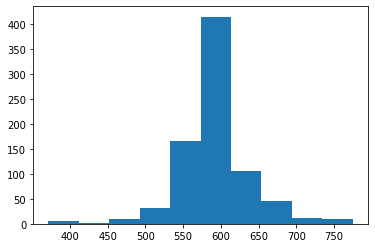

In [45]:
plt.hist(flat_samples[:,0])

In [47]:
labels=['Fault displacement', 'sigma']

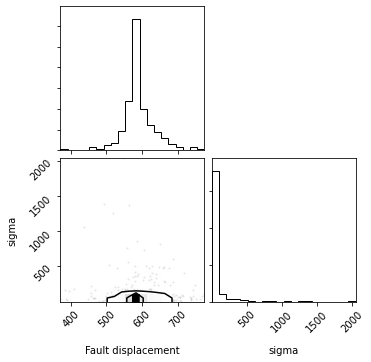

In [48]:
import corner
flat_samples.shape
fig = corner.corner(
    flat_samples,
    labels=labels
);

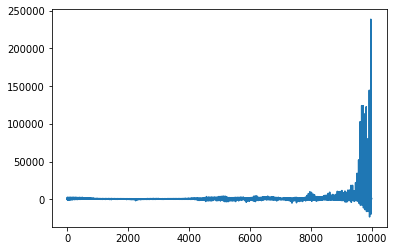

In [26]:
plt.plot(sampler.get_chain(flat=True)[:,0])

In [27]:
chain = sampler.get_chain()

In [28]:
chain.shape

(200, 50, 4)

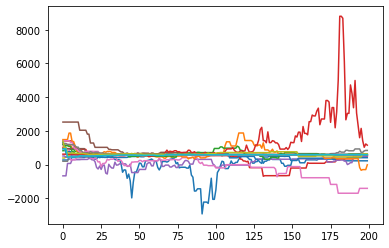

In [29]:
for i in range(20):
    plt.plot(chain[:,i,0])

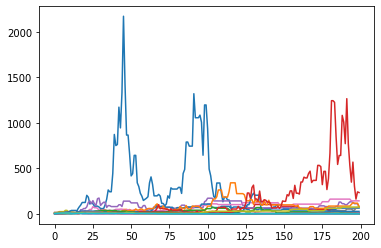

In [31]:
for i in range(20):
    plt.plot(chain[:,i,2])

In [ ]:
flat_samples[:,0]